# 1. Dataset dari Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Navigasi ke folder tempat dataset berada
data_dir = '/content/drive/MyDrive/TUGAS SEM.5/rps-cv-images'

# 2. EDA sederhana

Jumlah gambar di folder rock: 726


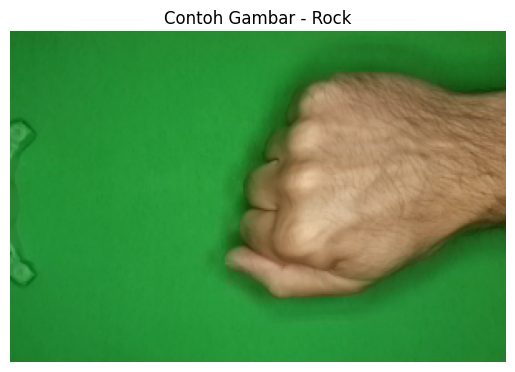

Jumlah gambar di folder paper: 712


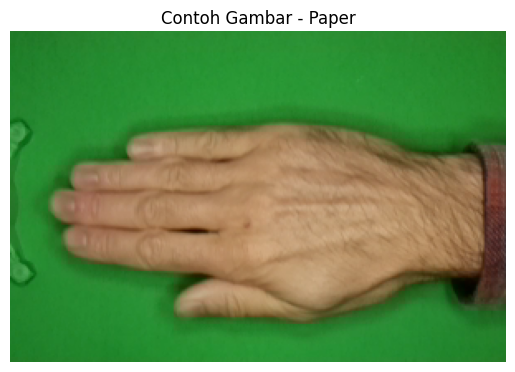

Jumlah gambar di folder scissors: 750


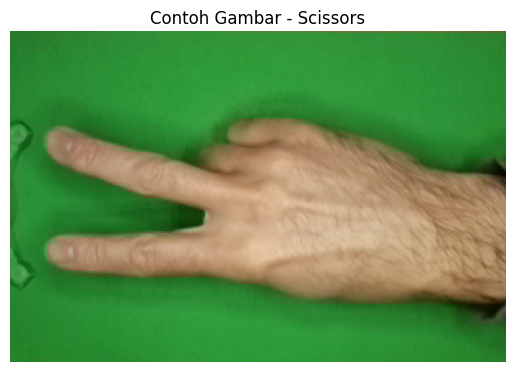

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Menampilkan jumlah gambar di setiap folder
categories = ['rock', 'paper', 'scissors']

# Iterasi untuk menampilkan contoh gambar dari setiap kategori
for category in categories:
    path = os.path.join(data_dir, category)

    # Menampilkan jumlah gambar di setiap folder
    print(f'Jumlah gambar di folder {category}: {len(os.listdir(path))}')

    # Ambil gambar pertama dari folder tersebut
    sample_img = os.path.join(path, os.listdir(path)[0])

    # Tampilkan gambar
    img = mpimg.imread(sample_img)
    plt.imshow(img)
    plt.title(f'Contoh Gambar - {category.capitalize()}')
    plt.axis('off')  # Sembunyikan sumbu
    plt.show()

# 3. Build Custom Data Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi data dan persiapan data train dan validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/TUGAS SEM.5/rps-cv-images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/TUGAS SEM.5/rps-cv-images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


# 4. Bangun Model AlexNet dan VGG16

In [ ]:
from tensorflow.keras import layers, models

# AlexNet Model (Kode Dosen)
class AlexNet:
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build_model(self):
        model = models.Sequential()

        # 1st Conv Layer
        model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=self.input_shape))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D((3, 3), strides=2))

        # 2nd Conv Layer
        model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D((3, 3), strides=2))

        # 3rd Conv Layer
        model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

        # 4th Conv Layer
        model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

        # 5th Conv Layer
        model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
        model.add(layers.MaxPooling2D((3, 3), strides=2))

        # Flattening
        model.add(layers.Flatten())

        # Fully Connected Layers
        model.add(layers.Dense(4096, activation='relu'))
        model.add(layers.Dropout(0.5))

        model.add(layers.Dense(4096, activation='relu'))
        model.add(layers.Dropout(0.5))

        model.add(layers.Dense(self.num_classes, activation='softmax'))

        return model

In [ ]:
# VGG16 Model (Kode Dosen)
class VGG16:
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build_model(self):
        model = models.Sequential()

        # Block 1
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=self.input_shape))
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

        # Block 2
        model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

        # Block 3
        model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

        # Block 4
        model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

        # Block 5
        model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

        # Flattening
        model.add(layers.Flatten())

        # Fully Connected Layers
        model.add(layers.Dense(4096, activation='relu'))
        model.add(layers.Dropout(0.5))

        model.add(layers.Dense(4096, activation='relu'))
        model.add(layers.Dropout(0.5))

        model.add(layers.Dense(self.num_classes, activation='softmax'))

        return model

In [ ]:
# Inisialisasi model dengan input shape dan jumlah kelas
input_shape = (224, 224, 3)
num_classes = 3

alexnet = AlexNet(input_shape=input_shape, num_classes=num_classes).build_model()
vgg16 = VGG16(input_shape=input_shape, num_classes=num_classes).build_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 5. Compile Model AlexNet dan VGG16

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile AlexNet
alexnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Compile VGG16
vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Plot Arsitektur Model

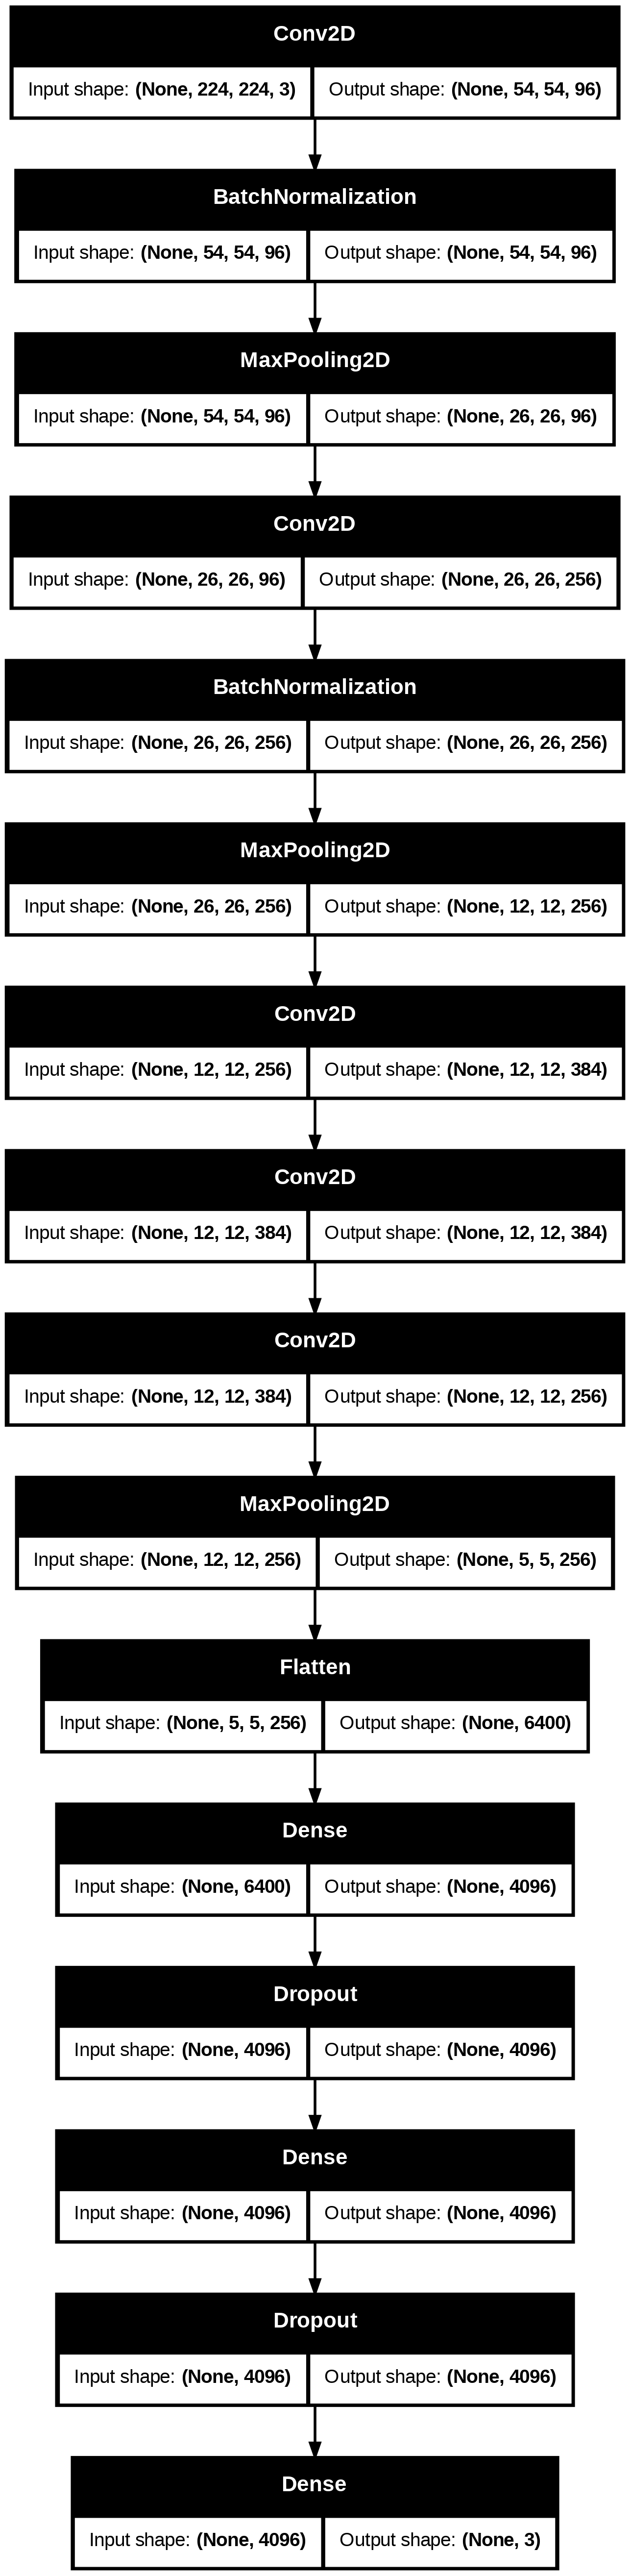

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot model AlexNet
plot_model(alexnet, to_file='alexnet_structure.png', show_shapes=True)

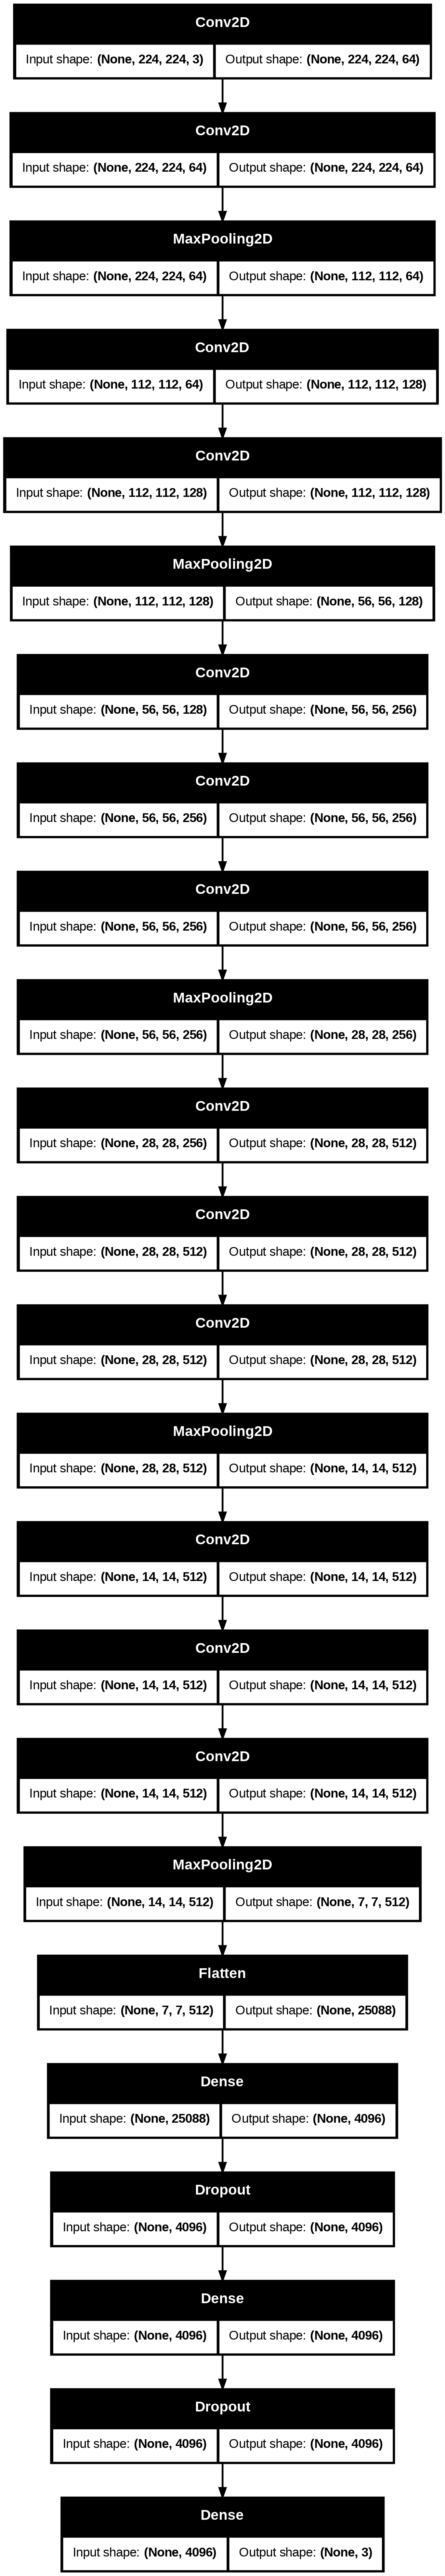

In [ ]:
# Plot model VGG16
plot_model(vgg16, to_file='vgg16_structure.png', show_shapes=True)

# 7. Train model dengan AlexNet dan VGG16

In [ ]:
# Training AlexNet
history_alexnet = alexnet.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 334s 6s/step - accuracy: 0.9704 - loss: 0.1574 - val_accuracy: 0.9703 - val_loss: 0.1342
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 377s 6s/step - accuracy: 0.9764 - loss: 0.0948 - val_accuracy: 0.6590 - val_loss: 2.0756
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 333s 6s/step - accuracy: 0.9745 - loss: 0.1075 - val_accuracy: 0.9451 - val_loss: 0.2252
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 330s 6s/step - accuracy: 0.9817 - loss: 0.0627 - val_accuracy: 0.8581 - val_loss: 0.6549
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 328s 6s/step - accuracy: 0.9922 - loss: 0.0457 - val_accuracy: 0.9062 - val_loss: 0.3913
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 386s 6s/step - accuracy: 0.9571 - loss: 0.2046 - val_accuracy: 0.9611 - val_loss: 0.1329
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 399s 6s/step - accuracy: 0.9686 - loss: 0.1477 - val_accuracy: 0.6339 - val_loss: 1.1953
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 362s 6s/step - accuracy: 0.9332 - loss: 0.3632 - val_accuracy: 0.9771 - v

In [ ]:
# Training VGG16
history_vgg16 = vgg16.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 537ms/step - accuracy: 0.3355 - loss: 1.0989 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 536ms/step - accuracy: 0.3351 - loss: 1.0987 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 535ms/step - accuracy: 0.3474 - loss: 1.0988 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 535ms/step - accuracy: 0.3113 - loss: 1.0995 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 530ms/step - accuracy: 0.3501 - loss: 1.0985 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 542ms/step - accuracy: 0.3424 - loss: 1.0985 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 40s 532ms/step - accuracy: 0.3542 - loss: 1.0982 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 43s 573ms/step - accuracy: 0.3369 - loss: 1.0987 - val_accu

# 8. Bandingkan performa model dengan matriks performa

Confusion Matriks

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Misalkan ukuran gambar dan batch size
img_height, img_width = 224, 224
batch_size = 32

# Menginisialisasi ImageDataGenerator untuk data validasi
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    '/content/drive/My Drive/TUGAS SEM.5/rps-cv-images',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Sesuaikan dengan mode yang kamu gunakan
)

def plot_confusion_matrix(model, generator, name):
    y_pred = np.argmax(model.predict(generator), axis=1)
    cm = confusion_matrix(generator.classes, y_pred)
    print(f"Confusion Matrix - {name}")
    print(cm)

# Contoh penggunaan
plot_confusion_matrix(alexnet, val_generator, "AlexNet")
plot_confusion_matrix(vgg16, val_generator, "VGG16")

Found 2188 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 414s 6s/step
Confusion Matrix - AlexNet
[[  0 712   0]
 [  1 725   0]
 [  0 750   0]]
69/69 ━━━━━━━━━━━━━━━━━━━━ 1426s 21s/step
Confusion Matrix - VGG16
[[645  67   0]
 [659  67   0]
 [699  51   0]]


Miss Classification

In [ ]:
def miss_classification_rate(model, generator, name):
    y_pred = np.argmax(model.predict(generator), axis=1)
    miss_rate = 1 - np.mean(y_pred == generator.classes)
    print(f"Miss Classification Rate - {name}: {miss_rate:.2f}")

# Example Usage:
miss_classification_rate(alexnet, val_generator, "AlexNet")
miss_classification_rate(vgg16, val_generator, "VGG16")

69/69 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step
Miss Classification Rate - AlexNet: 0.67
69/69 ━━━━━━━━━━━━━━━━━━━━ 1418s 21s/step
Miss Classification Rate - VGG16: 0.68


Classification Report

In [ ]:
from sklearn.metrics import classification_report

def classification_metrics(model, generator, name):
    y_pred = np.argmax(model.predict(generator), axis=1)
    print(f"Classification Report - {name}")
    print(classification_report(generator.classes, y_pred))

# Example Usage:
classification_metrics(alexnet, val_generator, "AlexNet")
classification_metrics(vgg16, val_generator, "VGG16")

69/69 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step
Classification Report - AlexNet
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       712
           1       0.33      1.00      0.50       726
           2       0.00      0.00      0.00       750

    accuracy                           0.33      2188
   macro avg       0.44      0.33      0.17      2188
weighted avg       0.44      0.33      0.17      2188



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


69/69 ━━━━━━━━━━━━━━━━━━━━ 1412s 20s/step
Classification Report - VGG16
              precision    recall  f1-score   support

           0       0.32      0.91      0.48       712
           1       0.34      0.09      0.14       726
           2       0.00      0.00      0.00       750

    accuracy                           0.33      2188
   macro avg       0.22      0.33      0.20      2188
weighted avg       0.22      0.33      0.20      2188



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Curve ROC

69/69 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step


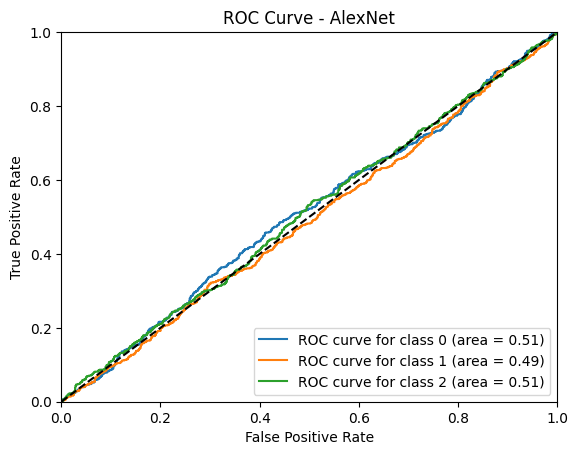

69/69 ━━━━━━━━━━━━━━━━━━━━ 1415s 21s/step


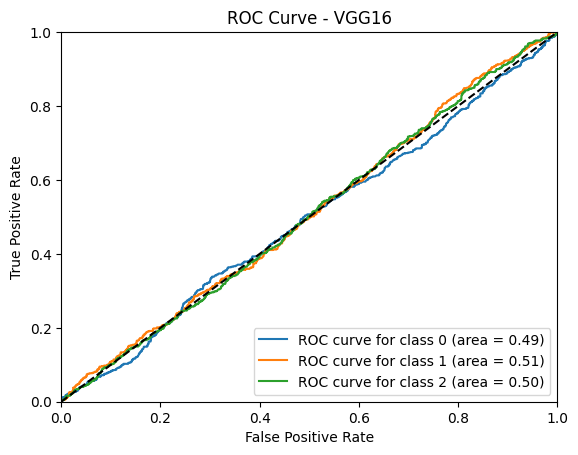

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, generator, name):
    y_pred_prob = model.predict(generator)
    n_classes = y_pred_prob.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(generator.classes == i, y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()

# Example Usage:
plot_roc_curve(alexnet, val_generator, "AlexNet")
plot_roc_curve(vgg16, val_generator, "VGG16")

## **Kesimpulan**

Kesimpulannya, VGG16 umumnya menunjukkan performa yang lebih unggul karena kemampuannya yang lebih besar dalam mempelajari data, meskipun waktu pelatihannya lebih lama. Model ini lebih sesuai untuk dataset rps-cv-images, terbukti dari keunggulannya dalam hal precision, recall, F1 score, dan ROC curve jika dibandingkan dengan AlexNet.

Perbedaan kinerja ini kemungkinan juga dipengaruhi oleh jumlah epoch yang digunakan. AlexNet mungkin cepat mencapai akurasi maksimalnya, sedangkan VGG16 cenderung membutuhkan lebih banyak epoch untuk mencapai performa optimal.